====> poutre encastree aux extremites
Nombre de noeuds : 40
Nombre de elements : 39
Fleche maximum =  0.0016807369089915205  [en m]
Moment maximum =  1050.2083333340172  [en N.m]
Contrainte maximum =  4.102376302086004  [en MPa]

 ===> poutre en rotation aux extremites
Nombre de noeuds : 40
Nombre de elements : 39
Fleche maximum =  0.008408107536800782  [en m]
Moment maximum =  4.612960680105971e-09  [en N.m]
Contrainte maximum =  1.8019377656663945e-11  [en MPa]


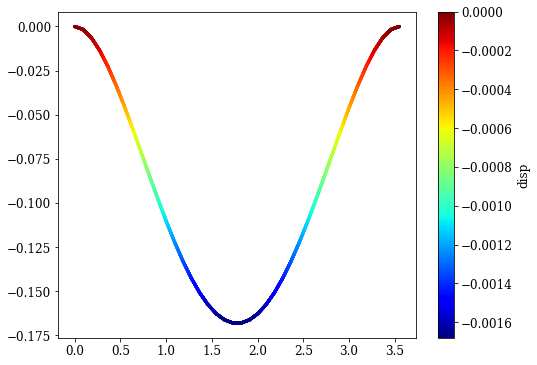

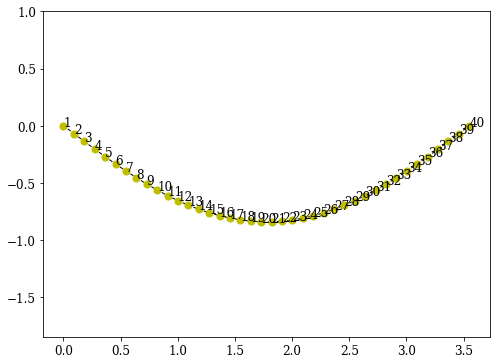

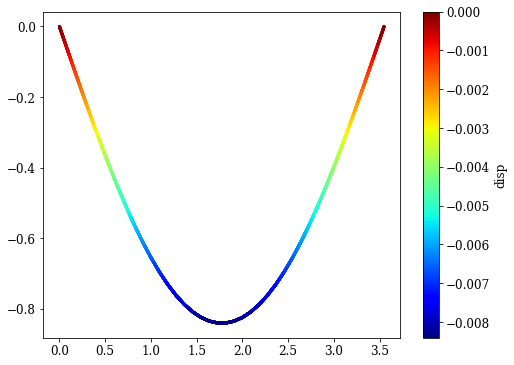

In [46]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.figsize"] = (8,6)
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 12
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np
from numpy.linalg import inv

# Definitin des parametres du problemes
nb_noeud = 40

E = 12e9 # Module D'Young [en Pa]
rho = 480 # Masse volumique [en kg/m3]
L = 3.55 # Longueur de la poutre [en m]
h = 0.160 # hauteur [en m]
b = 0.060 #largueur [en m]
S = b*h # Section [en m^2]
I = b*h**3/12 # Inertie [en m]
q = 1000 # Charge repartie (en N/m)
scale = 1e2

%run src\Fonctions.ipynb

def K_elem(L_e) :
    K_elem = E*I/L_e**3*np.array([[12, 6*L_e , -12, 6*L_e],
                            [6*L_e, 4*L_e**2 , -6*L_e, 2*L_e**2],
                            [-12, -6*L_e, 12, -6*L_e],
                            [6*L_e, 2*L_e**2 , -6*L_e , 4*L_e**2]])
    return K_elem

afficher = 1
print("====> poutre encastree aux extremites")
bc = 1
U,NL,EL, f_max, M_max,sig_max = solve_flexion(nb_noeud,bc,afficher)
plot_disp_flexion(NL,U,scale)
plot_disp_f(NL,U)

print("\n ===> poutre en rotation aux extremites")
bc= 2
U,NL,EL, f_max, M_max,sig_max = solve_flexion(nb_noeud,bc,afficher)
plot_disp_flexion(NL,U,scale)
plot_disp_f(NL,U)

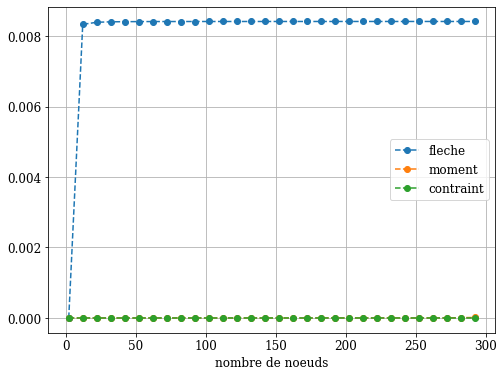

In [50]:
def convergence_fleche(nb_max):
    Nb = []
    F = []
    M = []
    S= []
    for i in range(2,nb_max,10) : 
        U,NL,EL, f_max, M_max,sig_max = solve_flexion(i,bc=2,afficher = 0)
        Nb.append(i)
        F.append(f_max)
        M.append(M_max)
        S.append(sig_max/1e6)
    plt.plot(Nb,F,'o--',label="fleche")
    plt.plot(Nb,M,'o--',label="moment")
    plt.plot(Nb,S,'o--',label="contraint")
    plt.legend()
    plt.xlabel("nombre de noeuds")
    plt.grid()
    return

convergence_fleche(nb_max=300)

### Résultats analytiques

On peut utiliser la résistance des matériaux pour modéliser une poutre en flexion encastrée à ses deux extremités. 

On obtient une fléche théorique de : 
$$ f_{max} = \frac{qL^4}{76.8EI} $$

Et un moment flechissant maxi mum théorique de :
$$ M_{max} = \frac{ql^2}{8} $$

In [39]:
print("f_max = ", q*L**4/76.8/E/I," m")
print("M_max = ", q*L**2/8, " N.m")
print("sigma_max = ", (q*L**2/8)/I*h/2/1e6, " MPa" )

f_max =  0.00841474566194746  m
M_max =  1575.3125  N.m
sigma_max =  6.153564453124999  MPa


### Sources

- <https://www.youtube.com/watch?v=KfkCBv4Ei_8> Classement visuel du bois
- <https://www.youtube.com/watch?v=7chqQ4mri0M> Classement mécanique du bois

### Références
[1] david gibert (vidéo Youtube)